In [204]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 
from pmdarima import auto_arima 
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [205]:
data=pd.read_csv('data/inflasi.csv', parse_dates=['Month'])
data

,Month,Inflasi
0,Juni 2019,3.28%
1,Mei 2019,3.32%
2,April 2019,2.83%
3,Maret 2019,2.48%
4,Februari 2019,2.57%
...,...,...
194,April 2003,7.62%
195,Maret 2003,7.17%
196,Februari 2003,7.60%
197,Januari 2003,8.68%


In [206]:
data.dtypes

Month      object
Inflasi    object
dtype: object

In [207]:
data.describe()

,Month,Inflasi
count,199,199
unique,199,170
top,Januari 2004,4.61%
freq,1,3


Mengubah Month ke type datetime dan Inflasi ke type float

In [208]:
ifl=np.array(data['Inflasi'])
ifl_new=[]
def toFloat(x):
    for i in ifl:
        new=float(i.strip('%'))
        ifl_new.append(new)

toFloat(ifl)
ifl_new[0]

3.28

In [209]:
mn=np.array(data['Month'])
month=[]
def toMonth(y):
    for i in y:
        if 'Januari ' in i:
            iy=i.strip('Januari ')
            iy=iy+'-01-01'
            month.append(iy)
        elif 'Februari ' in i:
            iy=i.strip('Februari ')
            iy=iy+'-02-01'
            month.append(iy)
        elif 'Maret ' in i:
            iy=i.strip('Maret ')
            iy=iy+'-03-01'
            month.append(iy)
        elif 'April ' in i:
            iy=i.strip('April ')
            iy=iy+'-04-01'
            month.append(iy)
        elif 'Mei ' in i:
            iy=i.strip('Mei ')
            iy=iy+'-05-01'
            month.append(iy)
        elif 'Juni ' in i:
            iy=i.strip('Juni ')
            iy=iy+'-06-01'
            month.append(iy)
        elif 'Juli ' in i:
            iy=i.strip('Juli ')
            iy=iy+'-07-01'
            month.append(iy)
        elif 'Agustus ' in i:
            iy=i.strip('Agustus ')
            iy=iy+'-08-01'
            month.append(iy)
        elif 'September ' in i:
            iy=i.strip('September ')
            iy=iy+'-09-01'
            month.append(iy)
        elif 'Oktober ' in i:
            iy=i.strip('Oktober ')
            iy=iy+'-10-01'
            month.append(iy)
        elif 'Nopember ' in i:
            iy=i.strip('Nopember ')
            iy=iy+'-11-01'
            month.append(iy)
        elif 'Desember ' in i:
            iy=i.strip('Desember ')
            iy=iy+'-12-01'
            month.append(iy)
    
toMonth(mn)
#print(month)

In [210]:
data['Inflasi']=ifl_new
data['Month']=month
data=data.iloc[::-1] # membalik urutan
data.to_csv('data/inflasi_new.csv')

In [211]:
data.describe()

,Inflasi
count,199.000000
mean,6.314724
std,3.316154
min,0.000000
25%,3.855000
50%,6.040000
75%,7.285000
max,18.380000


In [193]:
dtn=pd.read_csv('data/inflasi_new.csv', parse_dates=['Month'])
dtn=dtn[['Month','Inflasi']]
dtn.dtypes
#dtn

Month      datetime64[ns]
Inflasi           float64
dtype: object

In [214]:
dtn = dtn.rename(columns={
    'Inflasi':'Inflasi(%)'
})
dtn

,Month,Inflasi(%)
0,2002-12-01,0.00
1,2003-01-01,8.68
2,2003-02-01,7.60
3,2003-03-01,7.17
4,2003-04-01,7.62
...,...,...
194,2019-02-01,2.57
195,2019-03-01,2.48
196,2019-04-01,2.83
197,2019-05-01,3.32


In [215]:
dtn.head()

,Month,Inflasi(%)
0,2002-12-01,0.00
1,2003-01-01,8.68
2,2003-02-01,7.60
3,2003-03-01,7.17
4,2003-04-01,7.62


In [194]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [195]:
data = go.Scatter(
    x=dtn.Month,
    y=dtn.Inflasi,
    mode='lines+markers'
)
layout = {
    'title': {
        'text' : 'Inflasi vs Month',
        'x':0.5
    },
    'xaxis': { # memberi label
        'title':'month', 
    },
    'yaxis': {
        'title':'inflasi',
        
    }
    
}
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [196]:
# untuk analisa predictif saya menggunakan contoh model ARIMA dari internet, karena baru bisa linearRegression pada soal no.2

            Unnamed: 0  Inflasi
Month                          
2003-01-01         197     8.68
2003-02-01         196     7.60
2003-03-01         195     7.17
2003-04-01         194     7.62
2003-05-01         193     7.15


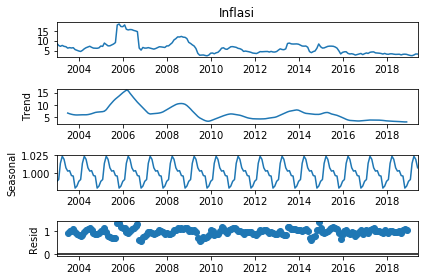

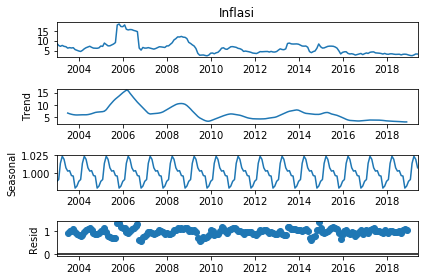

In [197]:
df = pd.read_csv('data/inflasi_new.csv', 
                       index_col ='Month', 
                       parse_dates = True) 
  
# Print the first five rows of the dataset 
df = df.iloc[1:]
print(df.head())
  
# ETS Decomposition 
result = seasonal_decompose(df['Inflasi'],  model ='multiplicative') 
result.plot() 

In [198]:
stepwise_fit = auto_arima(df['Inflasi'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=592.213, BIC=608.342, Time=1.030 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=1089.276, BIC=1095.727, Time=0.025 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=666.935, BIC=679.838, Time=0.270 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=775.596, BIC=788.499, Time=0.545 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=1087.828, BIC=1091.054, Time=0.013 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=754.069, BIC=766.972, Time=0.072 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=560.059, BIC=579.414, Time=1.050 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too cl

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  198
Model:             SARIMAX(1, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -263.832
Date:                                 Thu, 16 Apr 2020   AIC                            539.663
Time:                                         21:42:51   BIC                            559.017
Sample:                                              0   HQIC                           547.506
                                                 - 198                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0236      0.013     -1.816      0.069      -0.049       0.002
ar.L1          0.9372      0.033     28.621      0.000       0.873       1.001
ma.L1          0.2048      0.090      2.277      0.023       0.028       0.381
ma.S.L12      -1.9711     28.173     -0.070      0.944     -57.190      53.247
ma.S.L24       0.9755     27.509      0.035      0.972     -52.941      54.892
sigma2         0.5798     16.368      0.035      0.972     -31.500      32.660
===================================================================================
Ljung-Box (Q):                       25.42   Jarque-Bera (JB):              2414.70
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [199]:
train = df.iloc[:len(df)-12] 
test = df.iloc[len(df)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Inflasi'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Inflasi   No. Observations:                  186
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -260.574
Date:                            Thu, 16 Apr 2020   AIC                            531.147
Time:                                    21:42:55   BIC                            546.914
Sample:                                01-01-2003   HQIC                           537.544
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1714      0.104      1.640      0.101      -0.033       0.376
ar.S.L12      -0.5375      0.047    -11.432      0.000      -0.630      -0.445
ar.S.L24      -0.2182      0.046     -4.744      0.000      -0.308      -0.128
ma.S.L12      -0.9997     99.679     -0.010      0.992    -196.368     194.368
sigma2         0.8961     89.281      0.010      0.992    -174.091     175.883
===================================================================================
Ljung-Box (Q):                       17.78   Jarque-Bera (JB):              3682.85
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

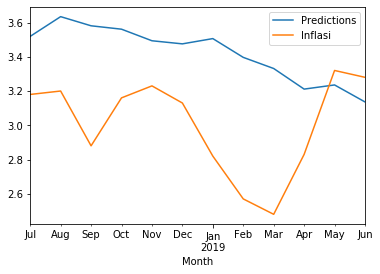

In [200]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Inflasi'].plot(legend = True)